# Assignment 1: Inspecting the Dataset

In this first assignment, we will get to know the dataset that we will be using throughout. You can find the assignment tasks at the bottom of this document.

Our dataset consists of short texts (article abstracts) from the [PubMed](https://www.ncbi.nlm.nih.gov/pubmed/) database of scientific publications in the Life Science domain. As the full dataset consists of millions of documents, we are using just a small subset, namely all publications that contain the word "cognition" in their title or abstract. You can download that dataset in the form of four files (`cognition_Summaries.pkl.bz2`, etc.) from this Github (data folder). Save these four files in a directory called `data` (do not unpack them, but save them as .bz2 files!), which should be a sub-directory of the one that contains this notebook file.

## Importing some Libraries

In [1]:
from collections import namedtuple, defaultdict, Counter
import pickle, bz2

## Loading the Dataset

In [2]:
Summaries_file = 'data/cognition_Summaries.pkl.bz2'
Summaries = pickle.load( bz2.BZ2File( Summaries_file, 'rb' ) )

To make it easier to access the data, we convert here paper entries into [named tuples](http://docs.python.org/3/library/collections.html#collections.namedtuple). This will allow us to refer to fields by keyword (like `var.year`), rather than index (like `var[2]`).

In [3]:
paper = namedtuple( 'paper', ['title', 'authors', 'year', 'doi'] )

for (id, paper_info) in Summaries.items():
    Summaries[id] = paper( *paper_info )

In [4]:
Summaries[36220089]

paper(title='Pollinator cognition: Framing bee memories in\xa0an\xa0ecological context.', authors=['Giurfa M'], year=2022, doi='10.1016/j.cub.2022.08.043')

In [5]:
Summaries[36220089].title

'Pollinator cognition: Framing bee memories in\xa0an\xa0ecological context.'

## Dataset Statistics

The two lines below will install [matplotlib](http://matplotlib.org/) and [NumPy](http://www.numpy.org/), if they are not installed already (if that doesn't work, you might have to download and install them from [here](http://matplotlib.org/downloads.html) and [here](http://sourceforge.net/projects/numpy/files/NumPy/1.10.1/)). We will need these libraries for drawing diagrams and analyzing the data below.

In [6]:
! pip install --user matplotlib
! pip install --user numpy

In [7]:
import matplotlib.pyplot as plt

# show plots inline within the notebook
%matplotlib inline
# set plots' resolution
plt.rcParams['savefig.dpi'] = 100

### Papers per Year

First, we will try to find out how many papers in the dataset were published per year. We are using the [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) class for this.

In [8]:
paper_years = [ p.year for p in Summaries.values() ]
papers_per_year = sorted( Counter(paper_years).items() )

print('Number of papers in the dataset per year for the past decade:')
print(papers_per_year[-10:])

Number of papers in the dataset per year for the past decade:
[(2014, 5455), (2015, 6000), (2016, 6494), (2017, 7049), (2018, 7431), (2019, 7920), (2020, 8757), (2021, 10568), (2022, 9781), (2023, 10)]


Filtering results, to obain only papers since 1940:

In [9]:
papers_per_year_since_1940 = [ (y,count) for (y,count) in papers_per_year if y >= 1940 ]
years_since_1940 = [ y for (y,count) in papers_per_year_since_1940 ]
nr_papers_since_1940 = [ count for (y,count) in papers_per_year_since_1940 ]

print('Number of papers in the dataset published since 1940:')
print(sum(nr_papers_since_1940))

Number of papers in the dataset published since 1940:
102110


Creating a bar plot to visualize the results (using [matplotlib.pyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar)):

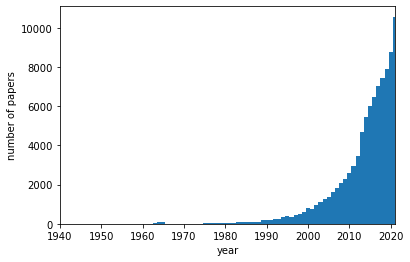

In [10]:
plt.bar(x=years_since_1940, height=nr_papers_since_1940, width=1.0)
plt.xlim(1940, 2021)
plt.xlabel('year')
plt.ylabel('number of papers');

Alternatively, we can get the same result by plotting it as a histogram with [matplotlib.pyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist):

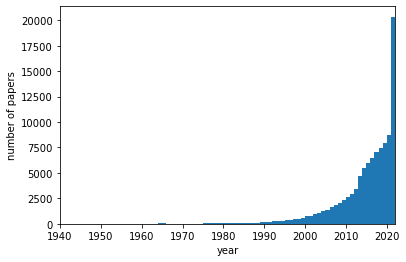

In [11]:
plt.hist( x=[p.year for p in Summaries.values()], bins=range(1940,2023) );
plt.xlim(1940, 2022)
plt.xlabel('year')
plt.ylabel('number of papers');

### Papers per Author

Here, we will obtain the distribution characterizing the number of papers published by an author.

In [12]:
# flattening the list of lists of authors:
flat_author_list = [ auth for paper in Summaries.values() for auth in paper.authors ]

nr_papers_by_author = Counter( flat_author_list )

In [13]:
print('Number of authors in the dataset with distinct names:')
print(len(nr_papers_by_author))

Number of authors in the dataset with distinct names:
232358


In [14]:
print('Top 50 authors with greatest number of papers:')
print(sorted(nr_papers_by_author.items(), key=lambda i:i[1], reverse=True)[:50])

Top 50 authors with greatest number of papers:
[('Wang Y', 661), ('Zhang Y', 580), ('Wang J', 523), ('Li Y', 485), ('Zhang J', 441), ('Wang X', 434), ('Liu Y', 392), ('Li X', 370), ('Zhang X', 368), ('Wang L', 347), ('Bennett DA', 345), ('Chen Y', 341), ('Zhang L', 318), ('Li J', 313), ('Liu X', 292), ('Liu J', 288), ('Wang H', 284), ('Wang Z', 279), ('Chen J', 274), ('Li H', 272), ('Chen X', 268), ('Zhang Z', 246), ('Zhang H', 240), ('Yang Y', 234), ('Zhang W', 218), ('Wang C', 218), ('Xu Y', 217), ('Wang S', 203), ('Alzheimer’s Disease Neuroimaging Initiative.', 202), ('Li Z', 199), ('Lee J', 199), ('Li S', 198), ('Yaffe K', 194), ('Harvey PD', 192), ('Yang J', 184), ('Li C', 184), ('Li W', 183), ('Li L', 181), ('Wang Q', 176), ('Wang W', 176), ('Chen L', 174), ('Zhou Y', 174), ('Chen H', 173), ('Wu Y', 173), ('Chen C', 172), ('Wilson RS', 172), ("Alzheimer's Disease Neuroimaging Initiative.", 170), ('Zhang M', 170), ('Xu X', 167), ('Li M', 166)]


Then we can create a histogram to visualize the results:

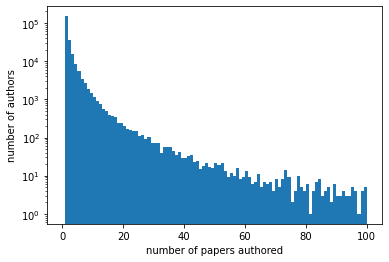

In [15]:
plt.hist( x=list(nr_papers_by_author.values()), bins=range(101), log=True )
plt.xlabel('number of papers authored')
plt.ylabel('number of authors');

### Authors per Paper

Then we can make a similar analysis for the number of authors per paper:

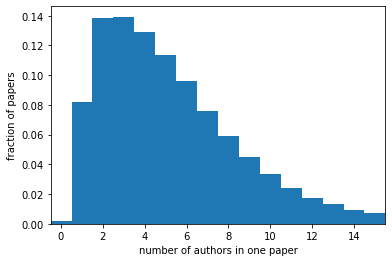

In [16]:
plt.hist(x=[ len(p.authors) for p in Summaries.values() ], bins=range(20), align='left', density=True)
plt.xlabel('number of authors in one paper')
plt.ylabel('fraction of papers')
plt.xlim(-0.5, 15.5);

### Words in Titles

And then we can have a first look into the words we find in titles (applying a very naive word splitting method for now):

In [17]:
words = [ word.lower() for paper in Summaries.values() for word in paper.title.split(' ') ]
word_counts = Counter(words)

print('Number of distinct words in the paper titles:')
print(len(word_counts))

Number of distinct words in the paper titles:
75212


----------

# Tasks

**Your name:** Szymon Dominik Modrzynski 52092522

### Task 1

Create a Python dictionary object that returns a set of all names of first authors (that is, the authors that appear first in the list of authors) for a given year. Name this dictionary `first_authors_at_year`. (You can use a [*defaultdict*](https://docs.python.org/3/library/collections.html#collections.defaultdict) with a default value of [*set*](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset).) Demonstrate the working of this dictionary by showing the set of first authors for the year 1970.

In [18]:
first_authors_at_year = defaultdict(set);

# if paper has authors -> add its first author
for paper in Summaries.values():
    if paper.authors:
        first_authors_at_year[paper.year].add(paper.authors[0])

print(first_authors_at_year[1970]);

{'Ishii S', 'Loprieno M', 'Abramov VG', 'Ganner H', 'Jarmuzek Z', 'Reitan RM', 'Maleev N', 'Dawson ME'}


### Task 2

Based on the dictionary `first_authors_at_year` from exercise 1 above, create a plot for the years from 1970 until now that shows how many authors published at least one paper as first author in the given particular year.

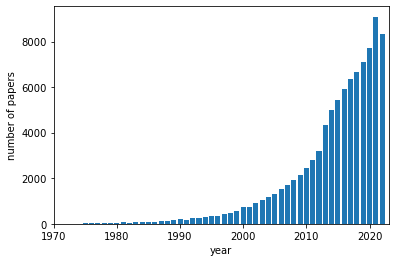

In [19]:
plt.bar(x = list(first_authors_at_year.keys()),
        height = list(len(first_authors_at_year[x]) for x in first_authors_at_year.keys()))
plt.xlim(1970, 2023)
plt.xlabel('year')
plt.ylabel('number of papers');

### Task 3

Print out the top 10 most often occurring words in the papers' titles together with their frequency, in descending order with respect to the frequency. Filter out words that are only one or two characters long, like `a` or `of`, to only show words that have three or more characters. Use the data structures created above (in the sections before the tasks).

In [20]:
most_occuring = word_counts

# filter out words shorter than 3
for word in list(most_occuring.keys()):
    if len(word) < 3:
        del(most_occuring[word])
        
# swap keys with values for easier access
most_occuring = {y: x for x, y in most_occuring.items()}

print([most_occuring[num] + ": " + str(num) for num in sorted(most_occuring, reverse = True)[:10]])

['and: 69010', 'the: 42637', 'cognitive: 24256', 'with: 21544', 'for: 13569', 'cognition: 10935', 'brain: 6789', 'effects: 6607', 'study.: 5600', 'patients: 5563']


### Task 4

Calculate and plot (e.g. using [plt.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)) a graph of the frequency of the 100 most frequent words in titles of papers, from most frequent to least frequent, again only counting words of three or more characters. (For readability, don't show the actual words.) Make again use of the data structures created above.

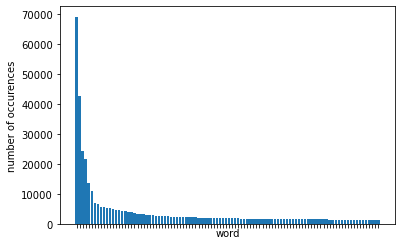

In [21]:
plt.bar(x = list(most_occuring[key] for key in sorted(most_occuring, reverse = True)[:100]),
        height = list(sorted(most_occuring, reverse = True)[:100]))
plt.xlabel('word')
plt.tick_params(labelbottom=False)
plt.ylabel('number of occurences');

### Task 5

What do you notice when looking at the top 10 most frequent words? Explain all types of words we find in this top-10 and why they show up here.

In [22]:
"""
Amongst the top 10 frequent words are, not surprisingly, the 3 common conjungtive words, the ones that survived the >2 character length
purge, the quite essential for English language word "the", which I have already used in this answer 5 times and the remaining 6
are research-field related words, which either constitute a part of a highly popular phrase on the topic e.g. cognitive(ability)
or simply are vital, most-commonly reffered to words such as brain, patients, cognition, study or effects.
"""

'\nAmongst the top 10 frequent words are, not surprisingly, the 3 common conjungtive words, the ones that survived the >2 character length\npurge, the quite essential for English language word "the", which I have already used in this answer 5 times and the remaining 6\nare research-field related words, which either constitute a part of a highly popular phrase on the topic e.g. cognitive(ability)\nor simply are vital, most-commonly reffered to words such as brain, patients, cognition, study or effects.\n'

# Submission

Submit the answers to the assignment via Canvas as a modified version of this Notebook file (file with `.ipynb` extension) that includes your code and your answers.

Before submitting, restart the kernel and re-run the complete code (**Kernel > Restart & Run All**), and then check whether your assignment code still works as expected.

Don't forget to add your name, and remember that the assignments have to be done **individually**, and that code sharing or copying are **strictly forbidden** and will be punished.